In [1]:
import os
import re

from PIL import Image
import cv2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime
import warnings
warnings.filterwarnings("ignore")

from colour_demosaicing import demosaicing_CFA_Bayer_bilinear as demosaic
import random
import shutil

## Image selection

In [9]:
inputpath_sunny = '../raw_data/2014-06-24-14-15-17_sunny/'
inputpath_overcast = '../raw_data/2014-06-26-08-53-56_overcast/'
outputpath_sunny = '../3000_images_test/sunny/'
outputpath_overcast = '../3000_images_test/overcast/'

In [10]:
def image_dirlist(input_path):
    list_ = []
    name_ = []
    for fname in os.listdir(input_path):
        path = os.path.join(input_path, fname)
        if os.path.isdir(path):
            list_.append(os.path.join(input_path+fname))
            name_.append(fname)
    return list_,name_

In [11]:
dirlist_sunny,name_sunny = image_dirlist(inputpath_sunny)
dirlist_overcast,name_overcast = image_dirlist(inputpath_overcast)

In [12]:
name_sunny

['mono_left', 'mono_rear', 'mono_right', 'stereo_centre', 'tag']

In [13]:
def random_image(in_path, out_path, f_name, sample_size):
    file_list = os.listdir(in_path)
    random_list = random.sample(file_list, sample_size)
    
    for file in random_list:
        shutil.copyfile(os.path.join(in_path, file), out_path+ '{0}_{1}'.format(name,file))

In [14]:
# Sunny store
for inputpath,name in zip(dirlist_sunny,name_sunny):
    if len(os.listdir(inputpath))>2:
        random_image(inputpath,outputpath_sunny,name,375)

In [15]:
# Overcast store 
for inputpath,name in zip(dirlist_overcast,name_overcast):
    if len(os.listdir(inputpath))>2:
        random_image(inputpath,outputpath_overcast,name,375)

## Image correction

In [17]:
sunny_path = '../3000_images_test/sunny/'
overcast_path = '../3000_images_test/overcast/'
bayer_stereo = 'gbrg'
bayer_mono = 'rggb'

In [18]:
sunny_stereo = [f for f in os.listdir(sunny_path) if re.match('stereo', f)]
sunny_mono = [f for f in os.listdir(sunny_path) if re.match('mono', f)]
overcast_stereo = [f for f in os.listdir(overcast_path) if re.match('stereo', f)]
overcast_mono = [f for f in os.listdir(overcast_path) if re.match('mono', f)]

In [ ]:
img = Image.open('../6000_images/sunny/stereo_centre_1403619590786297.png')

In [ ]:
img = img.resize((int(img.size[0]/4),int(img.size[1]/4)),Image.ANTIALIAS)

In [21]:
# sunny stereo correction 
for i in sunny_stereo:
    pattern = bayer_stereo
    img = Image.open(sunny_path + i)
    img_demosaic = Image.fromarray(demosaic(img, pattern))

    img_correction = img_demosaic.resize((int(img.size[0]/4),int(img.size[1]/4)),Image.ANTIALIAS)
    img_correction.save('../3000_images_test/c_sunny/{}'.format(i))

In [20]:
# sunny mono correction 
for i in sunny_mono:
    pattern = bayer_mono
    img = Image.open(sunny_path + i)
    img_demosaic = Image.fromarray(demosaic(img, pattern))

    img_correction = img_demosaic.resize((int(img.size[0]/4),int(img.size[1]/4)),Image.ANTIALIAS)
    img_correction.save('../3000_images_test/c_sunny/{}'.format(i))

In [22]:
# overcast stereo correction 
for i in overcast_stereo:
    pattern = bayer_stereo
    img = Image.open(overcast_path + i)
    img_demosaic = Image.fromarray(demosaic(img, pattern))

    img_correction = img_demosaic.resize((int(img.size[0]/4),int(img.size[1]/4)),Image.ANTIALIAS)
    img_correction.save('../3000_images_test/c_overcast/{}'.format(i))

In [23]:
# overcast mono correction 
for i in overcast_mono:
    pattern = bayer_mono
    img = Image.open(overcast_path + i)
    img_demosaic = Image.fromarray(demosaic(img, pattern))

    img_correction = img_demosaic.resize((int(img.size[0]/4),int(img.size[1]/4)),Image.ANTIALIAS)
    img_correction.save('../3000_images_test/c_overcast/{}'.format(i))

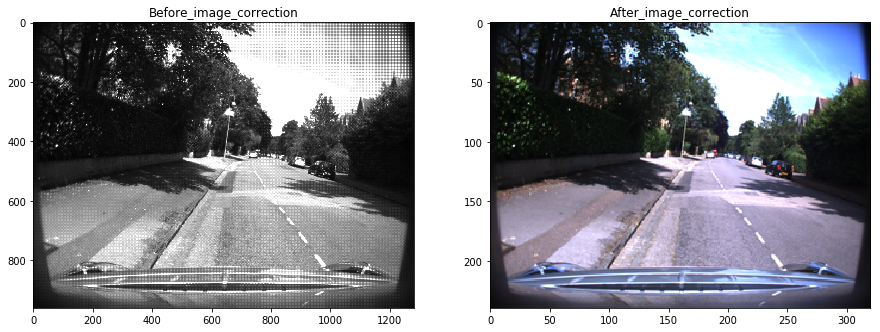

In [34]:
from matplotlib import gridspec
def correction_compare():
    fig = plt.figure(figsize=(15,10))
    gs = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)
    ax0 = plt.subplot(gs[0,0])
    ax1 = plt.subplot(gs[0,1])
    # sunny
    before = cv2.imread('../6000_images/sunny/stereo_centre_1403619594411338.png')
    ax0.axis('on')
    ax0.imshow(before)
    ax0.set_title('Before_image_correction')
    
    ax1.axis('on')
    after = cv2.imread('../6000_images/c_sunny/stereo_centre_1403619594411338.png')
    after = cv2.cvtColor(after, cv2.COLOR_BGR2RGB)
    ax1.imshow(after)
    ax1.set_title('After_image_correction')
    fig.show() 
correction_compare()